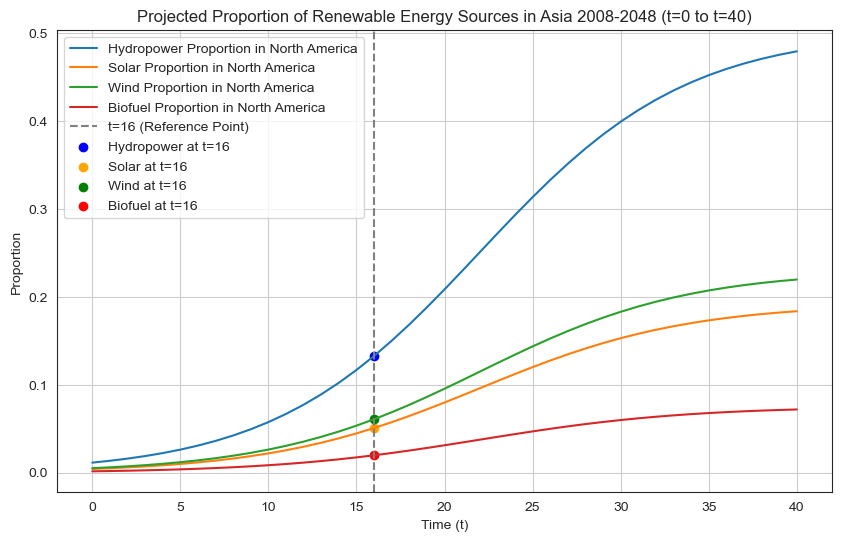

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the logistic function
L = 1.0  # Saturation level for the logistic function
k = 0.17002344  # Growth rate from the North America logistic model
t_inflection = 22  # Inflection point from the North America model

# Define the time period
t = np.arange(0, 41)  # From t=0 to t=40

# Logistic function for renewable energy proportion in North America
psi_NA = L / (1 + np.exp(-k * (t - t_inflection)))

# Initial proportions for each renewable at t=16
initial_proportions = {
    "Hydropower": 0.133,
    "Solar": 0.051,
    "Wind": 0.061,
    "Biofuel": 0.02
}

# Dictionary to store each renewable's proportion over time
renewable_proportions = {}

# Calculate the proportion over time for each renewable source
for source, initial_value in initial_proportions.items():
    # Initialize the proportion array for this renewable source
    proportions = np.zeros_like(t, dtype=float)
    proportions[16] = initial_value  # Set the known value at t=16

    # Forward recursion from t=17 to t=40
    for time in range(17, len(t)):
        proportions[time] = proportions[time - 1] * (psi_NA[time] / psi_NA[time - 1])

    # Reverse recursion from t=15 down to t=0
    for time in range(15, -1, -1):
        proportions[time] = proportions[time + 1] / (psi_NA[time + 1] / psi_NA[time])

    # Store the calculated proportions in the dictionary
    renewable_proportions[source] = proportions

# Plotting the renewable proportions for each source in North America
plt.figure(figsize=(10, 6))

for source, proportions in renewable_proportions.items():
    plt.plot(t, proportions, label=f'{source} Proportion in North America')

# Mark the known data points at t=16
plt.axvline(16, linestyle='--', color='gray', label='t=16 (Reference Point)')
plt.scatter(16, initial_proportions["Hydropower"], color='blue', label='Hydropower at t=16')
plt.scatter(16, initial_proportions["Solar"], color='orange', label='Solar at t=16')
plt.scatter(16, initial_proportions["Wind"], color='green', label='Wind at t=16')
plt.scatter(16, initial_proportions["Biofuel"], color='red', label='Biofuel at t=16')

# Add labels, title, and legend
plt.xlabel('Time (t)')
plt.ylabel('Proportion')
plt.title('Projected Proportion of Renewable Energy Sources in Asia 2008-2048 (t=0 to t=40)')
plt.legend()
plt.grid(True)
plt.savefig("RenewableLogisticAsia.png")
plt.show()



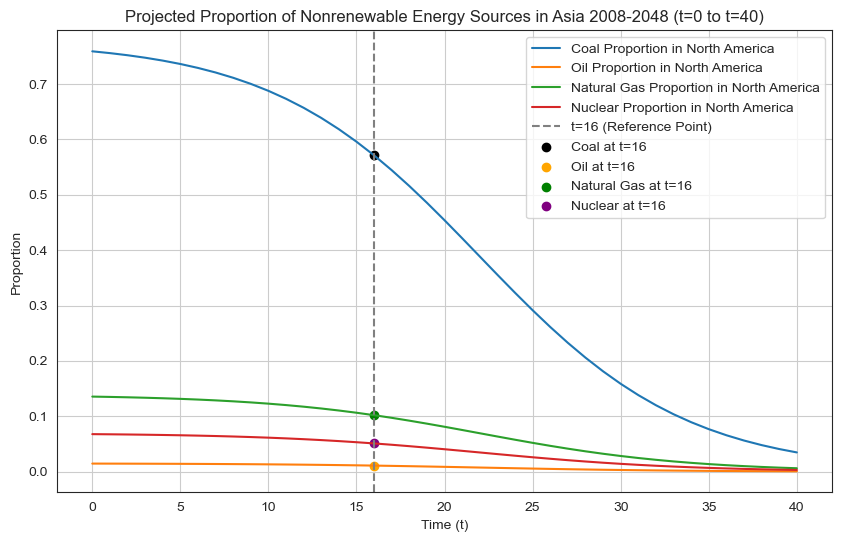

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the logistic function (for renewable sources)
L = 1.0  # Saturation level for the logistic function
k = 0.17002344  # Growth rate from the North America logistic model
t_inflection = 22  # Inflection point from the North America model

# Define the time period
t = np.arange(0, 41)  # From t=0 to t=40

# Logistic function for renewable energy proportion in North America
psi_NA = L / (1 + np.exp(-k * (t - t_inflection)))

# Initial proportions for each renewable at t=16
initial_proportions_renewable = {
    "Hydropower": 0.133,
    "Solar": 0.051,
    "Wind": 0.061,
    "Biofuel": 0.02
}

# Dictionary to store each renewable's proportion over time
renewable_proportions = {}

# Calculate the proportion over time for each renewable source
for source, initial_value in initial_proportions_renewable.items():
    # Initialize the proportion array for this renewable source
    proportions = np.zeros_like(t, dtype=float)
    proportions[16] = initial_value  # Set the known value at t=16

    # Forward recursion from t=17 to t=40
    for time in range(17, len(t)):
        proportions[time] = proportions[time - 1] * (psi_NA[time] / psi_NA[time - 1])

    # Reverse recursion from t=15 down to t=0
    for time in range(15, -1, -1):
        proportions[time] = proportions[time + 1] / (psi_NA[time + 1] / psi_NA[time])

    # Store the calculated proportions in the dictionary
    renewable_proportions[source] = proportions

# Initial proportions for each nonrenewable at t=16
initial_proportions_nonrenewable = {
    "Coal": 0.571,
    "Oil": 0.011,
    "Natural Gas": 0.102,
    "Nuclear": 0.051
}

# Dictionary to store each nonrenewable's proportion over time
nonrenewable_proportions = {}

# Calculate the proportion over time for each nonrenewable source
for source, initial_value in initial_proportions_nonrenewable.items():
    # Initialize the proportion array for this nonrenewable source
    proportions = np.zeros_like(t, dtype=float)
    proportions[16] = initial_value  # Set the known value at t=16

    # Forward recursion from t=17 to t=40
    for time in range(17, len(t)):
        renewable_sum = sum(renewable_proportions[renewable][time] for renewable in renewable_proportions)
        renewable_sum_prev = sum(renewable_proportions[renewable][time - 1] for renewable in renewable_proportions)
        
        nonrenewable_sum_prev = 1 - renewable_sum_prev  # Total nonrenewable at t-1

        # Apply the recursive formula
        proportions[time] = (1 - renewable_sum) / nonrenewable_sum_prev * proportions[time - 1]

    # Reverse recursion from t=15 down to t=0
    for time in range(15, -1, -1):
        renewable_sum = sum(renewable_proportions[renewable][time] for renewable in renewable_proportions)
        renewable_sum_next = sum(renewable_proportions[renewable][time + 1] for renewable in renewable_proportions)
        
        nonrenewable_sum = 1 - renewable_sum  # Total nonrenewable at t+1

        # Apply the reverse recursive formula
        proportions[time] = nonrenewable_sum / (1 - renewable_sum_next) * proportions[time + 1]

    # Store the calculated proportions in the dictionary
    nonrenewable_proportions[source] = proportions

# Plotting the nonrenewable proportions for each source in North America
plt.figure(figsize=(10, 6))

for source, proportions in nonrenewable_proportions.items():
    plt.plot(t, proportions, label=f'{source} Proportion in North America')

# Mark the known data points at t=16
plt.axvline(16, linestyle='--', color='gray', label='t=16 (Reference Point)')
plt.scatter(16, initial_proportions_nonrenewable["Coal"], color='black', label='Coal at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Oil"], color='orange', label='Oil at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Natural Gas"], color='green', label='Natural Gas at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Nuclear"], color='purple', label='Nuclear at t=16')

# Add labels, title, and legend
plt.xlabel('Time (t)')
plt.ylabel('Proportion')
plt.title('Projected Proportion of Nonrenewable Energy Sources in Asia 2008-2048 (t=0 to t=40)')
plt.legend()
plt.grid(True)
plt.savefig("NonrenewableLogisticAsia.png")
plt.show()


In [56]:
asiar = renewable_proportions
asiar

{'Hydropower': array([0.01163938, 0.0137375 , 0.01620132, 0.01908974, 0.0224693 ,
        0.02641442, 0.03100743, 0.03633804, 0.04250234, 0.04960093,
        0.0577361 , 0.06700785, 0.07750871, 0.08931719, 0.10249021,
        0.11705485, 0.133     , 0.15026905, 0.1687546 , 0.1882964 ,
        0.20868356, 0.2296615 , 0.25094339, 0.27222528, 0.29320322,
        0.31359038, 0.33313218, 0.35161773, 0.36888678, 0.38483193,
        0.39939657, 0.41256959, 0.42437807, 0.43487893, 0.44415068,
        0.45228585, 0.45938444, 0.46554874, 0.47087935, 0.47547236,
        0.47941748]),
 'Solar': array([0.00446322, 0.00526776, 0.00621253, 0.00732013, 0.00861605,
        0.01012884, 0.01189007, 0.01393414, 0.01629789, 0.01901991,
        0.02213941, 0.02569474, 0.02972139, 0.03424945, 0.03930076,
        0.04488569, 0.051     , 0.05762197, 0.06471041, 0.07220388,
        0.08002152, 0.08806569, 0.09622641, 0.10438714, 0.11243131,
        0.12024894, 0.12774241, 0.13483086, 0.14145283, 0.14756713,
   

In [57]:
asianr = nonrenewable_proportions
europenr['Coal'][22]




0.1464811815780788

In [58]:
europenr['Coal'][22]*1040 + europenr['Oil'][22]*1080 + europenr['Natural Gas'][22]*490 + europenr['Nuclear'][22]*12 + europer['Hydropower'][22]*24 + europer['Solar'][22]*48 + europer['Wind'][22]*12 + europer['Biofuel'][22]*230

271.47652996125447

In [59]:
europenr['Natural Gas'][22]

0.17266776152499788

In [60]:
europenr['Nuclear'][22]

0.15466448781149103

In [61]:
europer['Hydropower'][22]

0.1889460113196952

In [62]:
europer['Solar'][22]

0.08097686199415509

In [63]:
europer['Wind'][22]

0.17609254116189285

In [64]:
europer['Biofuel'][22]

0.05398457466277006

In [65]:
# Calculating total carbon emissions for Europe, Asia, and North America in 2030

# Europe
europe_emissions = (
    europenr['Coal'][16] * 1040 +
    europenr['Oil'][16] * 1080 +
    europenr['Natural Gas'][16] * 490 +
    europenr['Nuclear'][16] * 12 +
    europer['Hydropower'][16] * 24 +
    europer['Solar'][16] * 48 +
    europer['Wind'][16] * 12 +
    europer['Biofuel'][16] * 230
)
europe_emissions = europe_emissions*1.09*1000
# Asia
asia_emissions = (
    asianr['Coal'][16] * 1040 +
    asianr['Oil'][16] * 1080 +
    asianr['Natural Gas'][16] * 490 +
    asianr['Nuclear'][16] * 12 +
    asiar['Hydropower'][16] * 24 +
    asiar['Solar'][16] * 48 +
    asiar['Wind'][16] * 12 +
    asiar['Biofuel'][16] * 230
)
asia_emissions = asia_emissions*1.26*1000
# North America
north_america_emissions = (
    nanr['Coal'][16] * 1040 +
    nanr['Oil'][16] * 1080 +
    nanr['Natural Gas'][16] * 490 +
    nanr['Nuclear'][16] * 12 +
    nar['Hydropower'][16] * 24 +
    nar['Solar'][16] * 48 +
    nar['Wind'][16] * 12 +
    nar['Biofuel'][16] * 230
)
north_america_emissions = north_america_emissions*2.06*1000
# Print emissions for each continent
print(f"Europe Emissions (2030): {europe_emissions:.2f} Tons of CO2")
print(f"Asia Emissions (2030): {asia_emissions:.2f} Tons of CO2")
print(f"North America Emissions (2030): {north_america_emissions:.2f} Tons of CO2")

# Calculate global emissions
global_emissions = europe_emissions + asia_emissions + north_america_emissions
print(f"Global Emissions (2030): {global_emissions:.2f} Tons of CO2")


Europe Emissions (2030): 350493.86 Tons of CO2
Asia Emissions (2030): 840777.84 Tons of CO2
North America Emissions (2030): 792461.40 Tons of CO2
Global Emissions (2030): 1983733.10 Tons of CO2


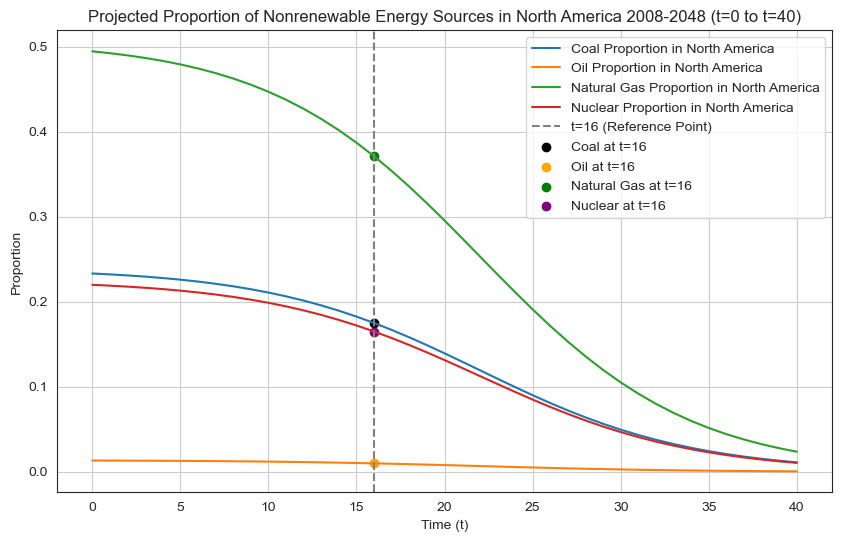

{'Hydropower': array([0.01225041, 0.01441931, 0.01695886, 0.01992732, 0.02339021,
        0.0274205 , 0.03209848, 0.03751117, 0.04375124, 0.05091509,
        0.05910001, 0.06840029, 0.07890221, 0.09067778, 0.10377767,
        0.11822344, 0.134     , 0.15104892, 0.16926383, 0.18848879,
        0.20852063, 0.22911558, 0.24999999, 0.2708844 , 0.29147935,
        0.31151119, 0.33073615, 0.34895106, 0.36599998, 0.38177654,
        0.39622231, 0.4093222 , 0.42109777, 0.43159969, 0.44089997,
        0.44908489, 0.45624874, 0.46248881, 0.46790151, 0.47257948,
        0.47660977]),
 'Solar': array([0.00283405, 0.00333581, 0.00392332, 0.00461005, 0.00541117,
        0.00634355, 0.00742577, 0.00867796, 0.01012156, 0.01177886,
        0.01367239, 0.01582395, 0.0182535 , 0.0209777 , 0.02400827,
        0.0273502 , 0.031     , 0.03494415, 0.03915805, 0.04360562,
        0.04823985, 0.05300435, 0.05783582, 0.06266729, 0.06743179,
        0.07206602, 0.07651359, 0.08072748, 0.08467164, 0.08832144,
   

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the logistic function (for renewable sources)
L = 1.0  # Saturation level for the logistic function
k = 0.16746558  # Growth rate from the North America logistic model
t_inflection = 22  # Inflection point from the North America model

# Define the time period
t = np.arange(0, 41)  # From t=0 to t=40

# Logistic function for renewable energy proportion in North America
psi_NA = L / (1 + np.exp(-k * (t - t_inflection)))

# Initial proportions for each renewable at t=16
initial_proportions_renewable = {
    "Hydropower": 0.134,
    "Solar": 0.031,
    "Wind": 0.093,
    "Biofuel": 0.01
}

# Dictionary to store each renewable's proportion over time
renewable_proportions = {}

# Calculate the proportion over time for each renewable source
for source, initial_value in initial_proportions_renewable.items():
    # Initialize the proportion array for this renewable source
    proportions = np.zeros_like(t, dtype=float)
    proportions[16] = initial_value  # Set the known value at t=16

    # Forward recursion from t=17 to t=40
    for time in range(17, len(t)):
        proportions[time] = proportions[time - 1] * (psi_NA[time] / psi_NA[time - 1])

    # Reverse recursion from t=15 down to t=0
    for time in range(15, -1, -1):
        proportions[time] = proportions[time + 1] / (psi_NA[time + 1] / psi_NA[time])

    # Store the calculated proportions in the dictionary
    renewable_proportions[source] = proportions

# Initial proportions for each nonrenewable at t=16
initial_proportions_nonrenewable = {
    "Coal": 0.175,
    "Oil": 0.01,
    "Natural Gas": 0.371,
    "Nuclear": 0.165
}

# Dictionary to store each nonrenewable's proportion over time
nonrenewable_proportions = {}

# Calculate the proportion over time for each nonrenewable source
for source, initial_value in initial_proportions_nonrenewable.items():
    # Initialize the proportion array for this nonrenewable source
    proportions = np.zeros_like(t, dtype=float)
    proportions[16] = initial_value  # Set the known value at t=16

    # Forward recursion from t=17 to t=40
    for time in range(17, len(t)):
        renewable_sum = sum(renewable_proportions[renewable][time] for renewable in renewable_proportions)
        renewable_sum_prev = sum(renewable_proportions[renewable][time - 1] for renewable in renewable_proportions)
        
        nonrenewable_sum_prev = 1 - renewable_sum_prev  # Total nonrenewable at t-1

        # Apply the recursive formula
        proportions[time] = (1 - renewable_sum) / nonrenewable_sum_prev * proportions[time - 1]

    # Reverse recursion from t=15 down to t=0
    for time in range(15, -1, -1):
        renewable_sum = sum(renewable_proportions[renewable][time] for renewable in renewable_proportions)
        renewable_sum_next = sum(renewable_proportions[renewable][time + 1] for renewable in renewable_proportions)
        
        nonrenewable_sum = 1 - renewable_sum  # Total nonrenewable at t+1

        # Apply the reverse recursive formula
        proportions[time] = nonrenewable_sum / (1 - renewable_sum_next) * proportions[time + 1]

    # Store the calculated proportions in the dictionary
    nonrenewable_proportions[source] = proportions

# Plotting the nonrenewable proportions for each source in North America
plt.figure(figsize=(10, 6))

for source, proportions in nonrenewable_proportions.items():
    plt.plot(t, proportions, label=f'{source} Proportion in North America')

# Mark the known data points at t=16
plt.axvline(16, linestyle='--', color='gray', label='t=16 (Reference Point)')
plt.scatter(16, initial_proportions_nonrenewable["Coal"], color='black', label='Coal at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Oil"], color='orange', label='Oil at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Natural Gas"], color='green', label='Natural Gas at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Nuclear"], color='purple', label='Nuclear at t=16')

# Add labels, title, and legend
plt.xlabel('Time (t)')
plt.ylabel('Proportion')
plt.title('Projected Proportion of Nonrenewable Energy Sources in North America 2008-2048 (t=0 to t=40)')
plt.legend()
plt.grid(True)
plt.savefig("NonrenewableLogistic.png")
plt.show()

nar = renewable_proportions
nanr = nonrenewable_proportions
nar


In [67]:
nanr

{'Coal': array([0.2332136 , 0.23217656, 0.2309623 , 0.22954295, 0.22788719,
        0.22596014, 0.22372341, 0.22113537, 0.21815173, 0.21472639,
        0.21081284, 0.20636598, 0.20134457, 0.19571417, 0.18945057,
        0.18254344, 0.175     , 0.16684819, 0.15813888, 0.14894662,
        0.13936855, 0.12952124, 0.11953552, 0.10954981, 0.0997025 ,
        0.09012443, 0.08093217, 0.07222285, 0.06407105, 0.05652761,
        0.04962048, 0.04335687, 0.03772648, 0.03270507, 0.02825821,
        0.02434466, 0.02091932, 0.01793568, 0.01534764, 0.01311091,
        0.01118385]),
 'Oil': array([0.01332649, 0.01326723, 0.01319785, 0.01311674, 0.01302213,
        0.01291201, 0.01278419, 0.01263631, 0.01246581, 0.01227008,
        0.01204645, 0.01179234, 0.0115054 , 0.01118367, 0.01082575,
        0.01043105, 0.01      , 0.00953418, 0.00903651, 0.00851124,
        0.00796392, 0.00740121, 0.0068306 , 0.00625999, 0.00569729,
        0.00514997, 0.0046247 , 0.00412702, 0.0036612 , 0.00323015,
        0.0

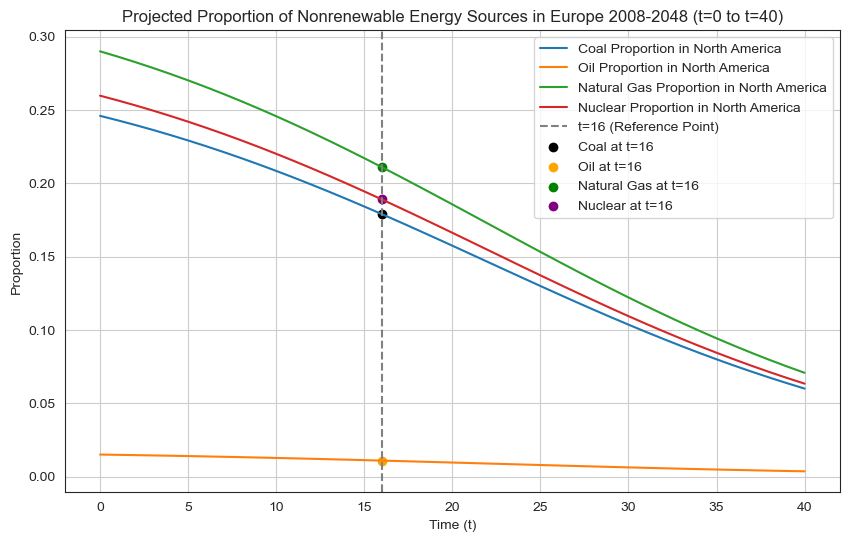

{'Hydropower': array([0.06059813, 0.06452558, 0.0686525 , 0.0729819 , 0.07751588,
        0.08225554, 0.08720088, 0.09235067, 0.09770236, 0.10325204,
        0.10899433, 0.11492233, 0.12102764, 0.12730028, 0.13372877,
        0.14030013, 0.147     , 0.15381268, 0.16072132, 0.16770803,
        0.17475405, 0.18183999, 0.18894601, 0.19605203, 0.20313797,
        0.210184  , 0.2171707 , 0.22407934, 0.23089202, 0.23759189,
        0.24416325, 0.25059174, 0.25686438, 0.26296969, 0.2688977 ,
        0.27463998, 0.28018966, 0.28554136, 0.29069114, 0.29563648,
        0.30037615]),
 'Solar': array([0.02597063, 0.02765382, 0.0294225 , 0.03127796, 0.03322109,
        0.03525238, 0.03737181, 0.03957886, 0.04187244, 0.04425087,
        0.04671185, 0.04925243, 0.05186899, 0.05455726, 0.05731233,
        0.06012863, 0.063     , 0.06591972, 0.06888057, 0.07187487,
        0.07489459, 0.07793143, 0.08097686, 0.0840223 , 0.08705913,
        0.09007886, 0.09307316, 0.096034  , 0.09895372, 0.1018251 ,
   

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the logistic function (for renewable sources)
L = 1.0  # Saturation level for the logistic function
k = 0.07525293  # Growth rate from the North America logistic model
t_inflection = 22  # Inflection point from the North America model

# Define the time period
t = np.arange(0, 41)  # From t=0 to t=40

# Logistic function for renewable energy proportion in North America
psi_NA = L / (1 + np.exp(-k * (t - t_inflection)))

# Initial proportions for each renewable at t=16
initial_proportions_renewable = {
    "Hydropower": 0.147,
    "Solar": 0.063,
    "Wind": 0.137,
    "Biofuel": 0.042
}

# Dictionary to store each renewable's proportion over time
renewable_proportions = {}

# Calculate the proportion over time for each renewable source
for source, initial_value in initial_proportions_renewable.items():
    # Initialize the proportion array for this renewable source
    proportions = np.zeros_like(t, dtype=float)
    proportions[16] = initial_value  # Set the known value at t=16

    # Forward recursion from t=17 to t=40
    for time in range(17, len(t)):
        proportions[time] = proportions[time - 1] * (psi_NA[time] / psi_NA[time - 1])

    # Reverse recursion from t=15 down to t=0
    for time in range(15, -1, -1):
        proportions[time] = proportions[time + 1] / (psi_NA[time + 1] / psi_NA[time])

    # Store the calculated proportions in the dictionary
    renewable_proportions[source] = proportions

# Initial proportions for each nonrenewable at t=16
initial_proportions_nonrenewable = {
    "Coal": 0.179,
    "Oil": 0.011,
    "Natural Gas": 0.211,
    "Nuclear": 0.189
}

# Dictionary to store each nonrenewable's proportion over time
nonrenewable_proportions = {}

# Calculate the proportion over time for each nonrenewable source
for source, initial_value in initial_proportions_nonrenewable.items():
    # Initialize the proportion array for this nonrenewable source
    proportions = np.zeros_like(t, dtype=float)
    proportions[16] = initial_value  # Set the known value at t=16

    # Forward recursion from t=17 to t=40
    for time in range(17, len(t)):
        renewable_sum = sum(renewable_proportions[renewable][time] for renewable in renewable_proportions)
        renewable_sum_prev = sum(renewable_proportions[renewable][time - 1] for renewable in renewable_proportions)
        
        nonrenewable_sum_prev = 1 - renewable_sum_prev  # Total nonrenewable at t-1

        # Apply the recursive formula
        proportions[time] = (1 - renewable_sum) / nonrenewable_sum_prev * proportions[time - 1]

    # Reverse recursion from t=15 down to t=0
    for time in range(15, -1, -1):
        renewable_sum = sum(renewable_proportions[renewable][time] for renewable in renewable_proportions)
        renewable_sum_next = sum(renewable_proportions[renewable][time + 1] for renewable in renewable_proportions)
        
        nonrenewable_sum = 1 - renewable_sum  # Total nonrenewable at t+1

        # Apply the reverse recursive formula
        proportions[time] = nonrenewable_sum / (1 - renewable_sum_next) * proportions[time + 1]

    # Store the calculated proportions in the dictionary
    nonrenewable_proportions[source] = proportions

# Plotting the nonrenewable proportions for each source in North America
plt.figure(figsize=(10, 6))

for source, proportions in nonrenewable_proportions.items():
    plt.plot(t, proportions, label=f'{source} Proportion in North America')

# Mark the known data points at t=16
plt.axvline(16, linestyle='--', color='gray', label='t=16 (Reference Point)')
plt.scatter(16, initial_proportions_nonrenewable["Coal"], color='black', label='Coal at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Oil"], color='orange', label='Oil at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Natural Gas"], color='green', label='Natural Gas at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Nuclear"], color='purple', label='Nuclear at t=16')

# Add labels, title, and legend
plt.xlabel('Time (t)')
plt.ylabel('Proportion')
plt.title('Projected Proportion of Nonrenewable Energy Sources in Europe 2008-2048 (t=0 to t=40)')
plt.legend()
plt.grid(True)
plt.savefig("NonrenewableLogisticEurope.png")
plt.show()

europer = renewable_proportions
europenr = nonrenewable_proportions
europer

In [69]:
europenr


{'Coal': array([0.24598341, 0.24293864, 0.23973922, 0.23638284, 0.23286785,
        0.22919341, 0.22535951, 0.22136712, 0.2172182 , 0.21291579,
        0.20846405, 0.20386834, 0.19913518, 0.19427229, 0.18928858,
        0.1841941 , 0.179     , 0.17371844, 0.16836249, 0.16294602,
        0.15748356, 0.15199015, 0.14648118, 0.14097221, 0.1354788 ,
        0.13001635, 0.12459988, 0.11924392, 0.11396236, 0.10876826,
        0.10367379, 0.09869007, 0.09382718, 0.08909402, 0.08449831,
        0.08004658, 0.07574416, 0.07159524, 0.06760285, 0.06376896,
        0.06009451]),
 'Oil': array([0.0151163 , 0.01492919, 0.01473258, 0.01452632, 0.01431032,
        0.01408451, 0.01384891, 0.01360357, 0.0133486 , 0.01308421,
        0.01281064, 0.01252822, 0.01223736, 0.01193852, 0.01163226,
        0.01131919, 0.011     , 0.01067543, 0.0103463 , 0.01001344,
        0.00967776, 0.00934018, 0.00900164, 0.0086631 , 0.00832551,
        0.00798983, 0.00765698, 0.00732784, 0.00700327, 0.00668408,
        0.0

In [70]:
asianr

{'Coal': array([0.75885414, 0.75560647, 0.75179273, 0.74732173, 0.74209051,
        0.73598385, 0.72887434, 0.72062308, 0.71108135, 0.70009344,
        0.68750102, 0.67314927, 0.65689499, 0.63861664, 0.61822611,
        0.59568151, 0.571     , 0.54426923, 0.51565544, 0.48540669,
        0.45384938, 0.42137762, 0.38843538, 0.35549314, 0.32302138,
        0.29146408, 0.26121533, 0.23260154, 0.20587077, 0.18118926,
        0.15864466, 0.13825413, 0.11997578, 0.1037215 , 0.08936975,
        0.07677732, 0.06578941, 0.05624769, 0.04799643, 0.04088692,
        0.03478025]),
 'Oil': array([0.01461891, 0.01455634, 0.01448287, 0.01439674, 0.01429596,
        0.01417832, 0.01404136, 0.01388241, 0.01369859, 0.01348691,
        0.01324433, 0.01296785, 0.01265472, 0.0123026 , 0.01190978,
        0.01147548, 0.011     , 0.01048505, 0.00993382, 0.00935109,
        0.00874316, 0.00811761, 0.00748299, 0.00684838, 0.00622283,
        0.00561489, 0.00503217, 0.00448094, 0.00396599, 0.00349051,
        0.0

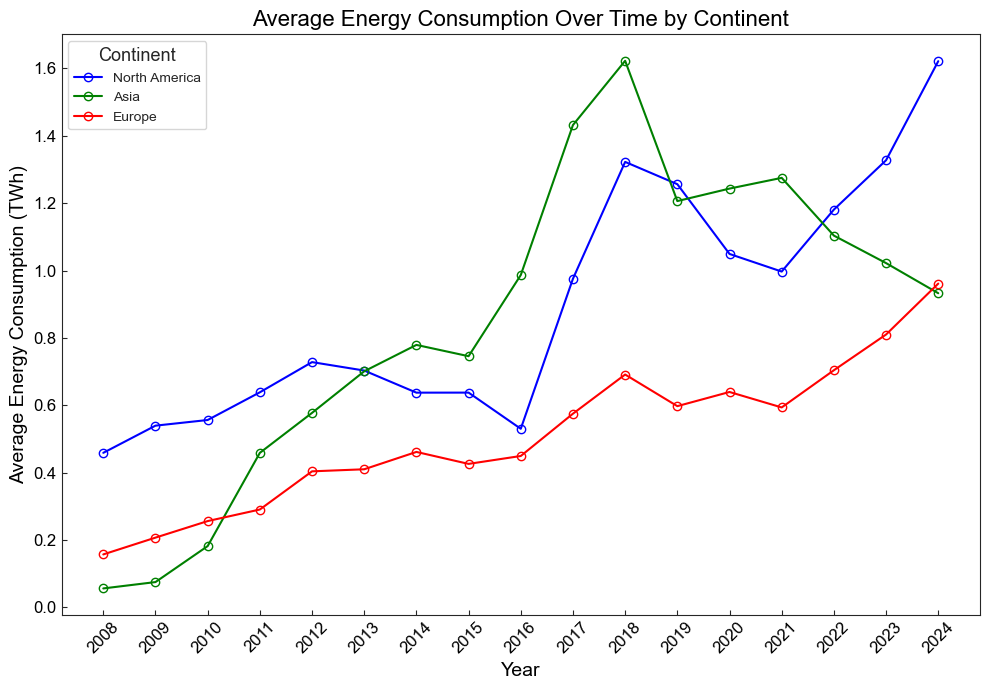

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Set Seaborn style for a clean background
sns.set_style("white")

# Dictionary to store total energy values by year and continent
data_by_continent = {}

# Loop through each file in the current directory
for filename in os.listdir('.'):
    # Exclude specific files
    if filename in ['TOP500_201611.xls', 'TOP500_201706.xls']:
        continue
    
    # Check if the file matches the expected format and is an Excel file
    if re.match(r'TOP500_\d{6}\.xls[x]?', filename):
        # Extract the date from the filename (format: TOP500_YYYYMM)
        year_month = filename[7:13]
        year = int(year_month[:4])
        month = year_month[4:]
        
        # Load the Excel file
        data = pd.read_excel(filename)
        
        # Determine the correct column name for power
        power_column = "Power (kW)" if year > 2016 or (year == 2016 and int(month) > 11) else "Power"
        
        # Group by continent and sum power values for each continent
        if power_column in data.columns:
            continent_power = data.groupby('Continent')[power_column].sum()
            
            # Add data to the dictionary
            for continent, total_power in continent_power.items():
                # Skip "South America", "Oceania", and "Africa"
                if continent in ["South America", "Oceania", "Africa"]:
                    continue
                # Combine "Americas" with "North America"
                if continent == "Americas":
                    continent = "North America"
                
                # Convert power to energy (TWh)
                total_energy = (total_power * 8760) / 1e9  # Convert to TWh
                
                if continent not in data_by_continent:
                    data_by_continent[continent] = {}
                if year not in data_by_continent[continent]:
                    data_by_continent[continent][year] = {}
                data_by_continent[continent][year][month] = total_energy

# Add interpolated points and calculate yearly averages
average_energy_by_year = {}
for continent, years in data_by_continent.items():
    average_energy_by_year[continent] = {'years': [], 'average_energy': []}
    for year, months in sorted(years.items()):
        # Use existing June and November data if available
        if '06' in months and '11' in months:
            june_value = months['06']
            november_value = months['11']
            avg_energy = (june_value + november_value) / 2
        elif year == 2016 and '06' in months:
            june_value = months['06']
            november_value = june_value + (months['06'] - june_value) / 3  # interpolated
            avg_energy = (june_value + november_value) / 2
        elif year == 2017 and '11' in months:
            november_value = months['11']
            june_value = june_value + 2 * (months['11'] - november_value) / 3  # interpolated
            avg_energy = (june_value + november_value) / 2
        elif year == 2024 and '06' in months:
            # For 2024, use only the June value directly
            avg_energy = months['06']
        else:
            continue  # Skip years without required data

        # Store the values in arrays for each continent
        average_energy_by_year[continent]['years'].append(year)
        average_energy_by_year[continent]['average_energy'].append(avg_energy)

# Plotting yearly averages
plt.figure(figsize=(10, 7))
colors = ['b', 'g', 'r', 'c', 'm', 'y']  # Define a color palette for continents

for idx, (continent, data) in enumerate(average_energy_by_year.items()):
    plt.plot(
        data['years'], data['average_energy'],
        linestyle='-', color=colors[idx % len(colors)], marker='o', markerfacecolor='none',
        markeredgecolor=colors[idx % len(colors)], label=continent
    )

# Formatting the plot
plt.title('Average Energy Consumption Over Time by Continent', fontsize=16, color='black')
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Average Energy Consumption (TWh)', fontsize=14, color='black')
plt.xticks(data['years'], rotation=45, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.gca().axes.tick_params(which='both', direction='in', left=True, right=False, top=False, bottom=True)
plt.gca().axes.tick_params(axis='x', labelsize=12)
plt.gca().axes.tick_params(axis='y', labelsize=12)

# Add a legend for the continents
plt.legend(title="Continent", fontsize=10, title_fontsize='13', loc='upper left')

# Save and show the plot
plt.tight_layout()
plt.savefig('averageEnergyByYear_with_interpolated_2024.png')
plt.show()


Continent: North America
Years: [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Average Energy: [0.4586058852, 0.5393248613999999, 0.5560979400000001, 0.6383398422, 0.7279990554, 0.702946638, 0.6373140024, 0.637445052, 0.5300247636000001, 1.1240735348, 1.3224653574, 1.2562903464, 1.0491831852, 0.996836535, 1.1809151454000002, 1.327359438, 1.6215505476]

Continent: Asia
Years: [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Average Energy: [0.055994139, 0.0748657194, 0.18172300260000002, 0.458557311, 0.5772644651999999, 0.7007148965999999, 0.7790803674, 0.7455511608000001, 0.9865316652, 1.5804071052, 1.6226561034000002, 1.2061535814, 1.2432433338, 1.275114141, 1.1036630268, 1.0220019564, 0.9325578012]

Continent: Europe
Years: [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Average Energy: [0.1569792438, 0.206864553, 0.25595

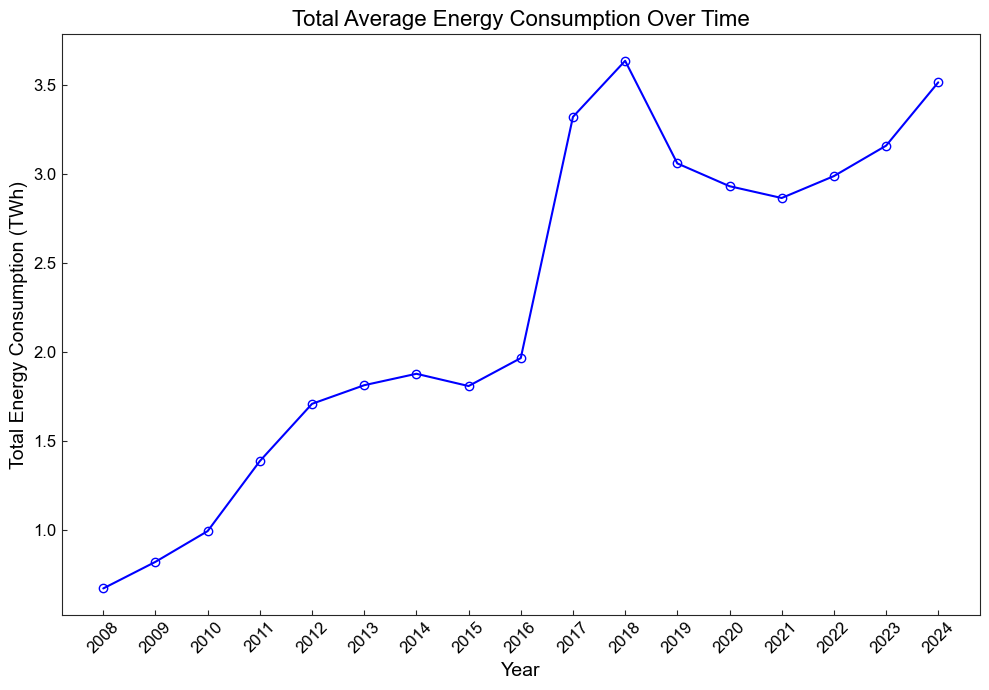

In [72]:
continent_averages = {}

# Calculate yearly averages, including interpolated points
for continent, years in data_by_continent.items():
    continent_averages[continent] = {'years': [], 'average_energy': []}
    for year, months in sorted(years.items()):
        # Use existing June and November data if available
        if '06' in months and '11' in months:
            june_value = months['06']
            november_value = months['11']
            avg_energy = (june_value + november_value) / 2
        elif year == 2016 and '06' in months:
            # Interpolated November 2016 value
            june_value = months['06']
            november_value = june_value + (months.get('11', june_value) - june_value) / 3
            avg_energy = (june_value + november_value) / 2
        elif year == 2017 and '11' in months:
            # Interpolated June 2017 value
            november_value = months['11']
            june_value = november_value + 2 * (june_value - november_value) / 3
            avg_energy = (june_value + november_value) / 2
        elif year == 2024 and '06' in months:
            # For 2024, use only the June value directly
            avg_energy = months['06']
        else:
            continue  # skip years without required data

        # Store the values in arrays for each continent
        continent_averages[continent]['years'].append(year)
        continent_averages[continent]['average_energy'].append(avg_energy)

# Print the arrays for verification
for continent, data in continent_averages.items():
    print(f"Continent: {continent}")
    print("Years:", data['years'])
    print("Average Energy:", data['average_energy'])
    print()

# Summing the total average energy consumption across all continents
total_average_energy = {}
for continent, data in continent_averages.items():
    for year, avg_energy in zip(data['years'], data['average_energy']):
        if year not in total_average_energy:
            total_average_energy[year] = 0
        total_average_energy[year] += avg_energy  # Sum energy across continents for each year

# Sort the data by year
years = sorted(total_average_energy.keys())
total_energy_values = [total_average_energy[year] for year in years]

# Plotting total average energy consumption over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(
    years, total_energy_values,
    linestyle='-', color='b', marker='o', markerfacecolor='none', markeredgecolor='b'
)
plt.title('Total Average Energy Consumption Over Time', fontsize=16, color='black')
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Total Energy Consumption (TWh)', fontsize=14, color='black')
plt.xticks(years, rotation=45, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.gca().axes.tick_params(which='both', direction='in', left=True, right=False, top=False, bottom=True)
plt.gca().axes.tick_params(axis='x', labelsize=12)
plt.gca().axes.tick_params(axis='y', labelsize=12)

# Save and show the plot
plt.tight_layout()
plt.savefig('totalAverageEnergyConsumption_with_2024.png')
plt.show()


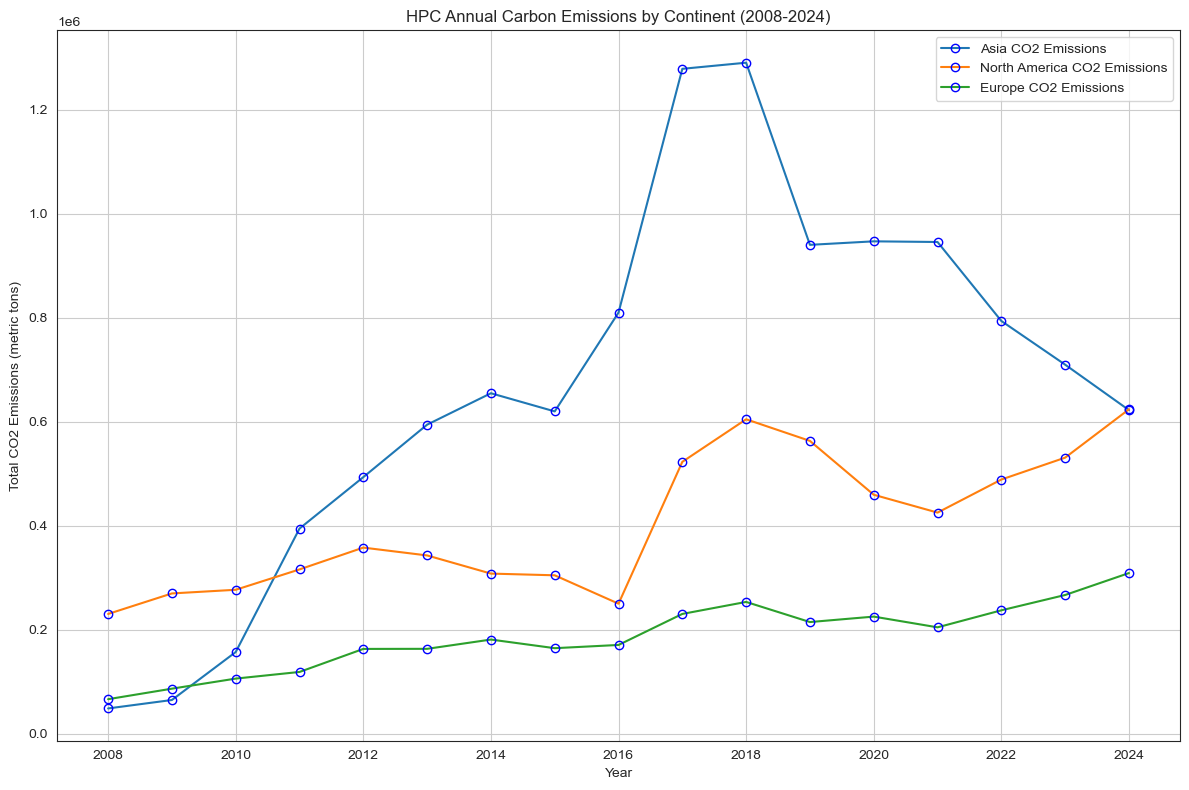

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Carbon intensity values (gCO2 per kWh) for each energy source
carbon_intensity = {
    "Coal": 1040,
    "Oil": 1080,
    "Natural Gas": 490,
    "Nuclear": 12,
    "Hydropower": 24,
    "Solar": 48,
    "Wind": 12,
    "Biofuel": 230
}

# Years to analyze
years = np.arange(2008, 2025)  # From 2008 to 2024

# Dictionary to store annual emissions for each continent
annual_emissions = {
    "Asia": [],
    "North America": [],
    "Europe": []
}

# Function to calculate emissions for a continent
def calculate_emissions(energy_years, energy_values, renewable_proportions, nonrenewable_proportions):
    continent_emissions = []
    for year in years:
        if year in energy_years:
            # Get the total energy consumption for the current year in TWh and convert to kWh
            total_energy_kwh = energy_values[energy_years.index(year)] * 1e9  # Convert TWh to kWh 

            # Initialize emissions for this year
            emissions = 0

            # Calculate emissions by summing contributions of each energy source
            for source, intensity in carbon_intensity.items():
                # Determine if the source is renewable or nonrenewable
                if source in renewable_proportions:
                    # Renewable source
                    proportion = renewable_proportions[source][year - 2008]
                elif source in nonrenewable_proportions:
                    # Nonrenewable source
                    proportion = nonrenewable_proportions[source][year - 2008]
                else:
                    continue  # Skip if source is not defined in proportions

                # Calculate emissions contribution of this source
                source_emission = total_energy_kwh * proportion * (intensity / 1000000)  # Convert gCO2 to kgCO2 to metric tons
                emissions += source_emission

            # Store the calculated emissions for this year
            continent_emissions.append(emissions)
        else:
            # If data for the year is missing, add None or 0
            continent_emissions.append(None)
    
    return continent_emissions

# Calculate emissions for each continent
annual_emissions["Asia"] = calculate_emissions(
    continent_averages["Asia"]["years"],
    continent_averages["Asia"]["average_energy"],
    asiar, asianr
)

annual_emissions["North America"] = calculate_emissions(
    continent_averages["North America"]["years"],
    continent_averages["North America"]["average_energy"],
    nar, nanr
)

annual_emissions["Europe"] = calculate_emissions(
    continent_averages["Europe"]["years"],
    continent_averages["Europe"]["average_energy"],
    europer, europenr
)

# Plot annual carbon emissions from 2008 to 2024 for each continent
plt.figure(figsize=(12, 8))

for continent, emissions in annual_emissions.items():
    plt.plot(years, emissions, linestyle='-', marker='o', markerfacecolor='none', markeredgecolor='b', label=f'{continent} CO2 Emissions')

# Formatting the plot
plt.title('HPC Annual Carbon Emissions by Continent (2008-2024)')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (metric tons)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save and show the plot
plt.savefig("AnnualCarbonEmissions_byContinent.png")
plt.show()



Calculating emissions for Asia in 2024:
Total Energy (TWh): 0.9325578012 TWh
Converted Total Energy: 932557801.1999999 kWh

Energy Source: Coal
 - Carbon Intensity: 1040 gCO2 per kWh
 - Proportion: 0.571
 - energy: 932557801.1999999
 - Emissions from Coal: 553790124.664608 kgCO2

Energy Source: Oil
 - Carbon Intensity: 1080 gCO2 per kWh
 - Proportion: 0.011
 - energy: 932557801.1999999
 - Emissions from Oil: 11078786.678256 kgCO2

Energy Source: Natural Gas
 - Carbon Intensity: 490 gCO2 per kWh
 - Proportion: 0.102
 - energy: 932557801.1999999
 - Emissions from Natural Gas: 46609238.903975986 kgCO2

Energy Source: Nuclear
 - Carbon Intensity: 12 gCO2 per kWh
 - Proportion: 0.051
 - energy: 932557801.1999999
 - Emissions from Nuclear: 570725.3743343999 kgCO2

Energy Source: Hydropower
 - Carbon Intensity: 24 gCO2 per kWh
 - Proportion: 0.133
 - energy: 932557801.1999999
 - Emissions from Hydropower: 2976724.5014304 kgCO2

Energy Source: Solar
 - Carbon Intensity: 48 gCO2 per kWh
 - Pro

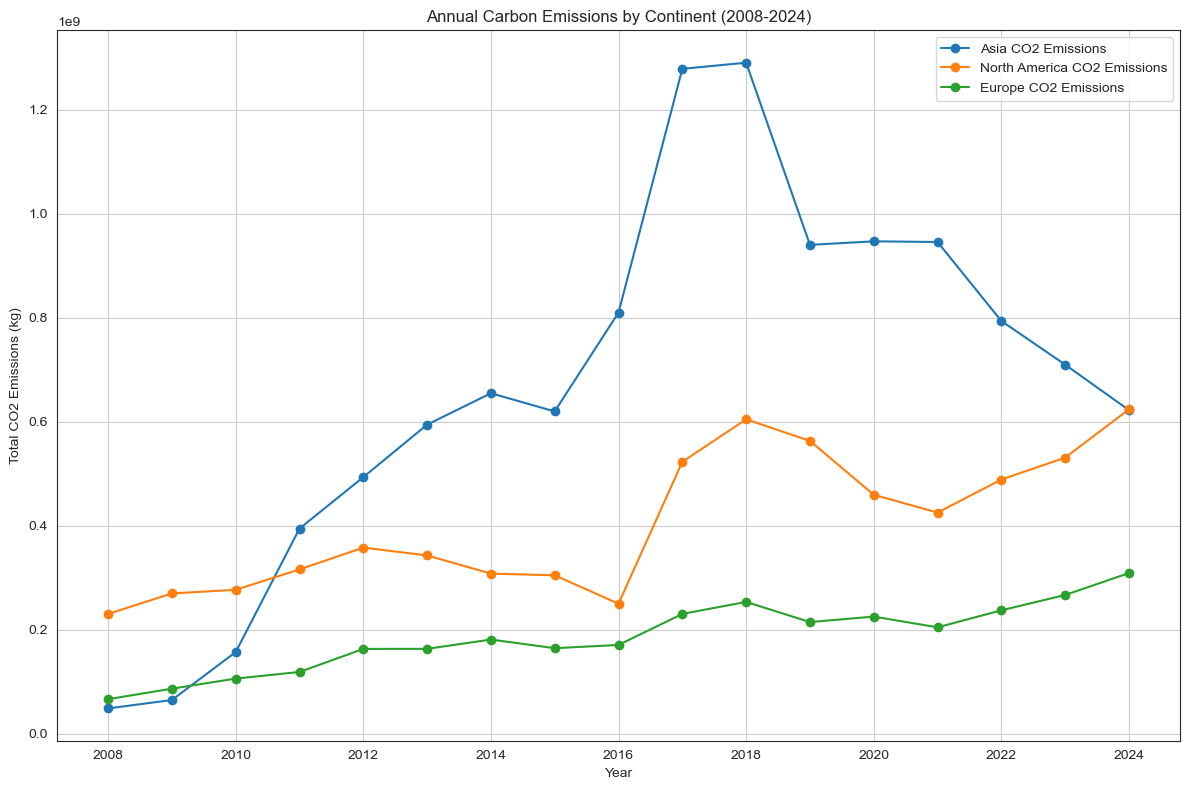

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Carbon intensity values (gCO2 per kWh) for each energy source
carbon_intensity = {
    "Coal": 1040,
    "Oil": 1080,
    "Natural Gas": 490,
    "Nuclear": 12,
    "Hydropower": 24,
    "Solar": 48,
    "Wind": 12,
    "Biofuel": 230
}

# Years to analyze
years = np.arange(2008, 2025)  # From 2008 to 2024

# Dictionary to store annual emissions for each continent
annual_emissions = {
    "Asia": [],
    "North America": [],
    "Europe": []
}

# Function to calculate emissions for a continent
def calculate_emissions(energy_years, energy_values, renewable_proportions, nonrenewable_proportions, continent_name=""):
    continent_emissions = []
    for year in years:
        if year in energy_years:
            # Get the total energy consumption for the current year in TWh and convert to kWh
            total_energy_kwh = energy_values[energy_years.index(year)] * 1e9  # Convert TWh to kWh

            # Initialize emissions for this year
            emissions = 0

            # Check for Asia in 2024
            if continent_name == "Asia" and year == 2024:
                print(f"\nCalculating emissions for Asia in {year}:")
                print(f"Total Energy (TWh): {energy_values[energy_years.index(year)]} TWh")
                print(f"Converted Total Energy: {total_energy_kwh} kWh")

            # Calculate emissions by summing contributions of each energy source
            for source, intensity in carbon_intensity.items():
                # Determine if the source is renewable or nonrenewable
                if source in renewable_proportions:
                    # Renewable source
                    proportion = renewable_proportions[source][year - 2008]
                elif source in nonrenewable_proportions:
                    # Nonrenewable source
                    proportion = nonrenewable_proportions[source][year - 2008]
                else:
                    continue  # Skip if source is not defined in proportions

                # Calculate emissions contribution of this source
                source_emission = total_energy_kwh * proportion * (intensity / 1000)  # Convert gCO2 to kgCO2
                emissions += source_emission

                # Print detailed calculations for Asia in 2024
                if continent_name == "Asia" and year == 2024:
                    print(f"\nEnergy Source: {source}")
                    print(f" - Carbon Intensity: {intensity} gCO2 per kWh")
                    print(f" - Proportion: {proportion}")
                    print(f" - energy: {total_energy_kwh}")
                    print(f" - Emissions from {source}: {source_emission} kgCO2")

            # Store the calculated emissions for this year
            continent_emissions.append(emissions)

            # Print total emissions for Asia in 2024
            if continent_name == "Asia" and year == 2024:
                print(f"\nTotal Emissions for Asia in 2024: {emissions} kgCO2")

        else:
            # If data for the year is missing, add None or 0
            continent_emissions.append(None)
    
    return continent_emissions

# Calculate emissions for each continent
annual_emissions["Asia"] = calculate_emissions(
    continent_averages["Asia"]["years"],
    continent_averages["Asia"]["average_energy"],
    asiar, asianr,
    continent_name="Asia"
)

annual_emissions["North America"] = calculate_emissions(
    continent_averages["North America"]["years"],
    continent_averages["North America"]["average_energy"],
    nar, nanr,
    continent_name="North America"
)

annual_emissions["Europe"] = calculate_emissions(
    continent_averages["Europe"]["years"],
    continent_averages["Europe"]["average_energy"],
    europer, europenr,
    continent_name="Europe"
)

# Plot annual carbon emissions from 2008 to 2024 for each continent
plt.figure(figsize=(12, 8))

for continent, emissions in annual_emissions.items():
    plt.plot(years, emissions, marker='o', label=f'{continent} CO2 Emissions')

# Formatting the plot
plt.title('Annual Carbon Emissions by Continent (2008-2024)')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (kg)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save and show the plot
plt.savefig("AnnualCarbonEmissions_byContinent.png")
plt.show()


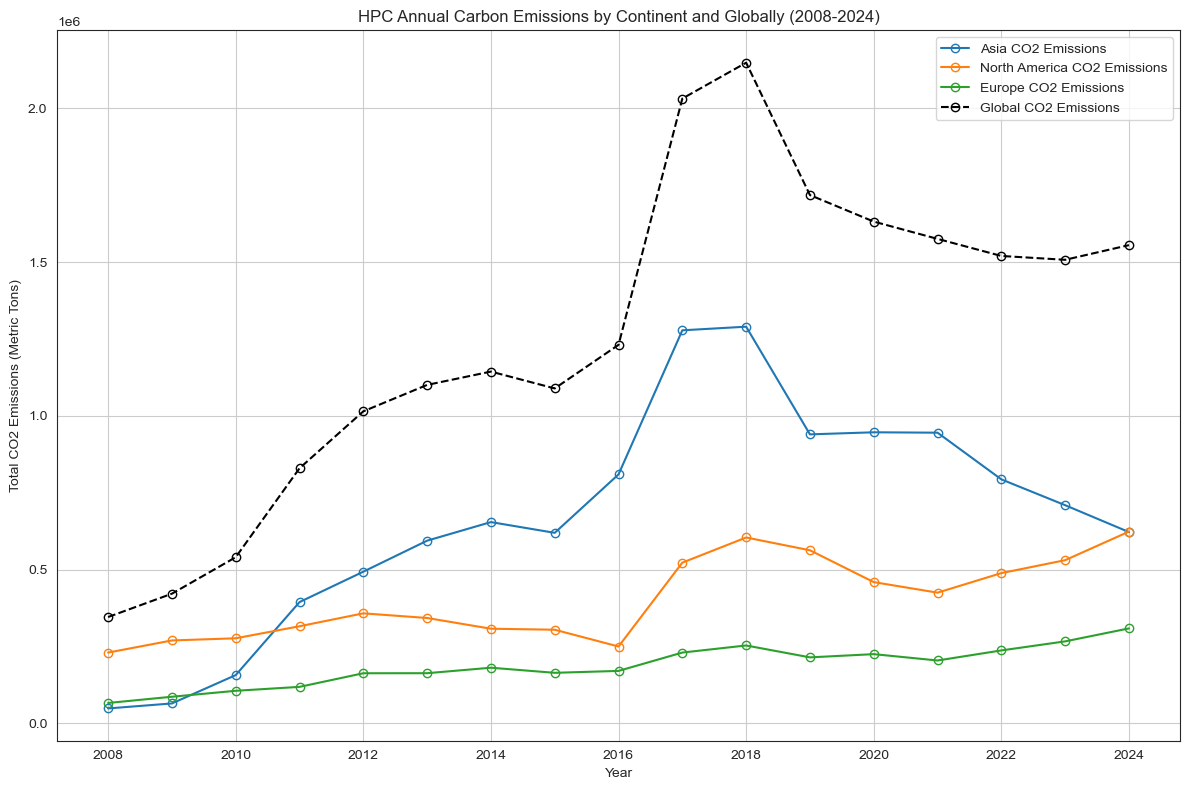

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Carbon intensity values (gCO2 per kWh) for each energy source
carbon_intensity = {
    "Coal": 1040,
    "Oil": 1080,
    "Natural Gas": 490,
    "Nuclear": 12,
    "Hydropower": 24,
    "Solar": 48,
    "Wind": 12,
    "Biofuel": 230
}

# Years to analyze
years = np.arange(2008, 2025)  # From 2008 to 2024

# Dictionary to store annual emissions for each continent
annual_emissions = {
    "Asia": [],
    "North America": [],
    "Europe": []
}

# Function to calculate emissions for a continent
def calculate_emissions(energy_years, energy_values, renewable_proportions, nonrenewable_proportions):
    continent_emissions = []
    for year in years:
        if year in energy_years:
            # Get the total energy consumption for the current year in TWh and convert to kWh
            total_energy_kwh = energy_values[energy_years.index(year)] * 1e9  # Convert TWh to kWh

            # Initialize emissions for this year
            emissions = 0

            # Calculate emissions by summing contributions of each energy source
            for source, intensity in carbon_intensity.items():
                # Determine if the source is renewable or nonrenewable
                if source in renewable_proportions:
                    # Renewable source
                    proportion = renewable_proportions[source][year - 2008]
                elif source in nonrenewable_proportions:
                    # Nonrenewable source
                    proportion = nonrenewable_proportions[source][year - 2008]
                else:
                    continue  # Skip if source is not defined in proportions

                # Calculate emissions contribution of this source
                source_emission = total_energy_kwh * proportion * (intensity / 1000000)  # Convert gCO2 to metric tons
                emissions += source_emission

            # Store the calculated emissions for this year
            continent_emissions.append(emissions)
        else:
            # If data for the year is missing, add None or 0
            continent_emissions.append(None)
    
    return continent_emissions

# Calculate emissions for each continent
annual_emissions["Asia"] = calculate_emissions(
    continent_averages["Asia"]["years"],
    continent_averages["Asia"]["average_energy"],
    asiar, asianr
)

annual_emissions["North America"] = calculate_emissions(
    continent_averages["North America"]["years"],
    continent_averages["North America"]["average_energy"],
    nar, nanr
)

annual_emissions["Europe"] = calculate_emissions(
    continent_averages["Europe"]["years"],
    continent_averages["Europe"]["average_energy"],
    europer, europenr
)

# Calculate global emissions by summing emissions across all continents for each year
global_emissions = []
for i in range(len(years)):
    total_emission = sum(
        annual_emissions[continent][i] for continent in annual_emissions if annual_emissions[continent][i] is not None
    )
    global_emissions.append(total_emission)

# Plot annual carbon emissions from 2008 to 2024 for each continent and global emissions
plt.figure(figsize=(12, 8))

for continent, emissions in annual_emissions.items():
    plt.plot(years, emissions, linestyle='-', marker='o', markerfacecolor='none', label=f'{continent} CO2 Emissions')

# Plot global emissions
plt.plot(years, global_emissions, linestyle='--', marker='o', markerfacecolor='none', color='black', label='Global CO2 Emissions')

# Formatting the plot
plt.title('HPC Annual Carbon Emissions by Continent and Globally (2008-2024)')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (Metric Tons)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save and show the plot
plt.savefig("AnnualCarbonEmissions_Global.png")
plt.show()


In [76]:
global_emissions

[346048.8706508645,
 421912.4517333912,
 540466.2902106107,
 829688.3846740612,
 1014770.5856195197,
 1100708.6877246236,
 1144009.1285686914,
 1089242.0954024445,
 1230887.8757844178,
 2031599.4178735956,
 2148228.9017889183,
 1717894.940787096,
 1631628.1397989672,
 1575425.662964688,
 1519917.1188194565,
 1507443.7583141269,
 1555134.3293056823]

C:\Users\Admin\AppData\Local\Temp\ipykernel_23056\328797159.py:27: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_23056\328797159.py:30: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.savefig("GlobalTemperatureChange.png")


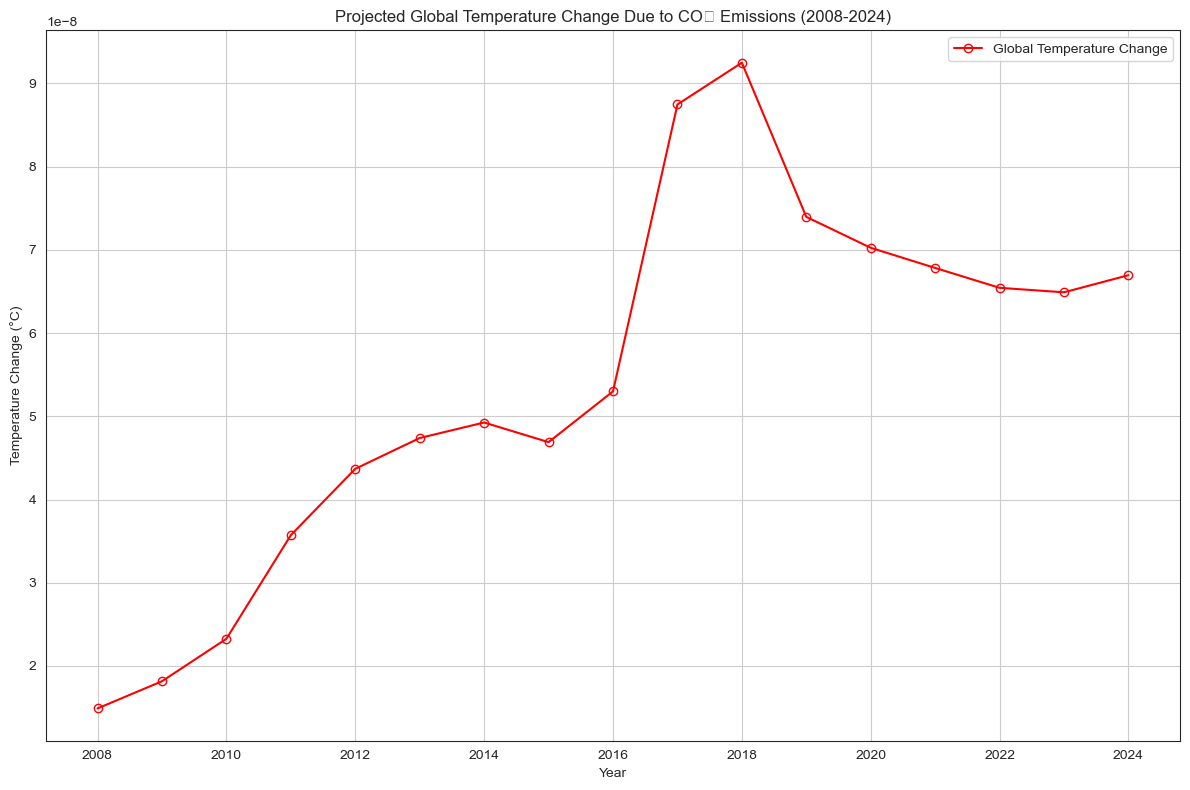

[1.4900291502979858e-08,
 1.816685095047628e-08,
 2.3271586727105313e-08,
 3.572501353590046e-08,
 4.36943445320167e-08,
 4.739470305171358e-08,
 4.925914897918179e-08,
 4.690096344342255e-08,
 5.299999814882549e-08,
 8.747732251657036e-08,
 9.249918958115045e-08,
 7.396972469213987e-08,
 7.025521355057304e-08,
 6.783522859798958e-08,
 6.544512267768338e-08,
 6.490804136628954e-08,
 6.696151778991531e-08]

In [119]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
C0 = 280  # Preindustrial CO₂ levels in ppm
climate_sensitivity = 4.8  # Climate sensitivity, λ
co2_conversion_factor = 2.13e12  # Factor to convert kg CO₂ to ppm
radiative_forcing_factor = 5.35  # Constant in radiative forcing equation

# Convert global CO₂ emissions (kg) to CO₂ concentration (ppm) and add to preindustrial level for each year
global_co2_ppm = [C0 + (emissions / co2_conversion_factor) for emissions in global_emissions]

# Calculate radiative forcing ΔF(t) and temperature change ΔT(t)
radiative_forcing = [radiative_forcing_factor * np.log(co2 / C0) for co2 in global_co2_ppm]
temperature_change = [climate_sensitivity * df for df in radiative_forcing]

# Plot global temperature change from 2008 to 2024
plt.figure(figsize=(12, 8))
plt.plot(years, temperature_change, marker='o', linestyle='-', markerfacecolor='none', color='red', label='Global Temperature Change')

# Formatting the plot
plt.title('Projected Global Temperature Change Due to CO₂ Emissions (2008-2024)')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save and show the plot
plt.savefig("GlobalTemperatureChange.png")
plt.show()
temperature_change 

Percentage change in temperature for +10% emissions: [10.000034438382615, 10.000031383527123, 9.99998284331122, 9.999996800128438, 10.00000782063285, 9.999999989849254, 9.99998262585691, 10.000010931936842, 9.99999783691078, 9.999998677588355, 10.000002445985952, 9.999997671547069, 10.000004043090003, 9.999997463726197, 9.999999114702913, 9.999999107608506, 10.000002540307394]
Percentage change in temperature for -10% emissions: [-9.999996170547409, -9.999999996816564, -10.000007346652572, -9.999996801519591, -9.999994772349233, -9.99999999169486, -10.000005779232477, -9.99998661824801, -9.999997838974647, -9.999998680994748, -9.999996285095651, -10.000005383129222, -9.999995929552064, -9.999997466367763, -9.999999117251358, -9.999999110136109, -10.0000025429149]


C:\Users\Admin\AppData\Local\Temp\ipykernel_23056\1948342077.py:59: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_23056\1948342077.py:62: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.savefig("SensitivityAnalysisTemperatureChange.png")


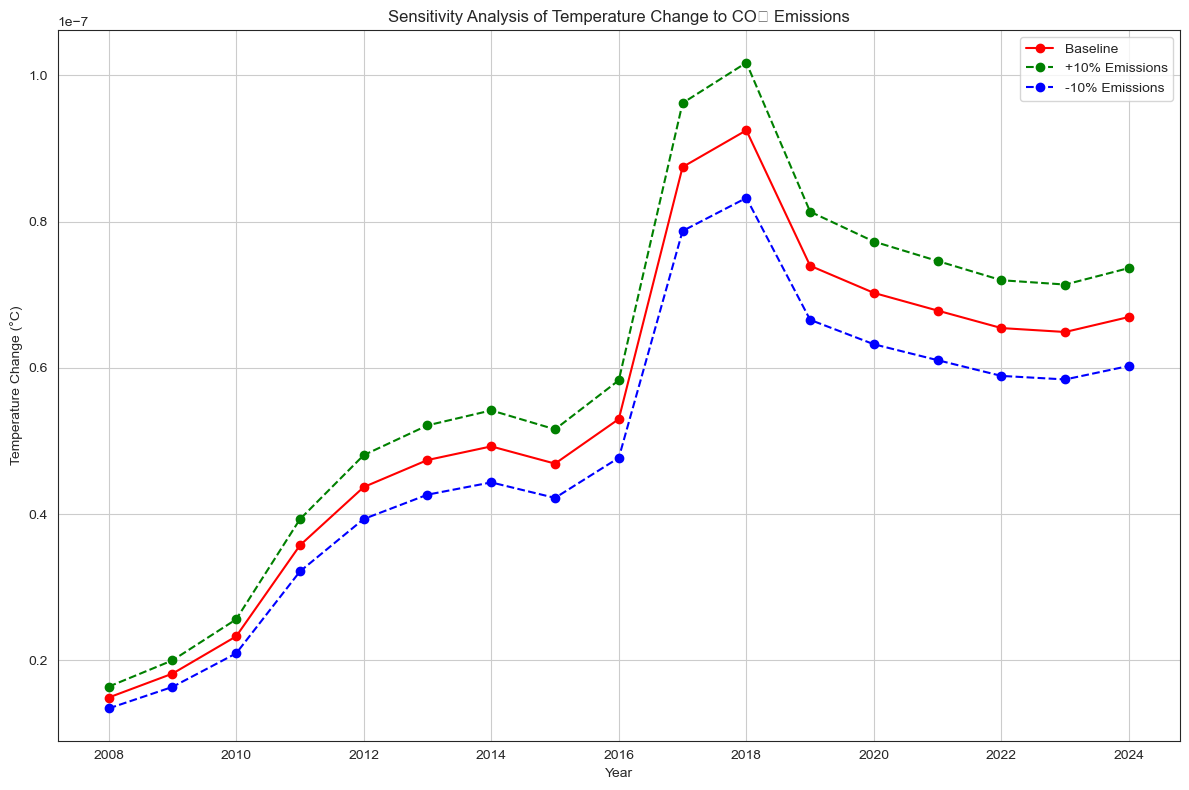

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
C0 = 280  # Preindustrial CO₂ levels in ppm
climate_sensitivity = 4.8  # Climate sensitivity, λ
co2_conversion_factor = 2.13e12  # Factor to convert kg CO₂ to ppm
radiative_forcing_factor = 5.35  # Constant in radiative forcing equation

# Define global emissions and years (replace these with your actual data)


# Create sensitivity scenarios (+10% and -10% emissions)
global_emissions_plus_10 = [emission * 1.10 for emission in global_emissions]
global_emissions_minus_10 = [emission * 0.90 for emission in global_emissions]

# Calculate CO₂ concentrations for each scenario
global_co2_ppm = [C0 + (emissions / co2_conversion_factor) for emissions in global_emissions]
global_co2_ppm_plus_10 = [C0 + (emissions / co2_conversion_factor) for emissions in global_emissions_plus_10]
global_co2_ppm_minus_10 = [C0 + (emissions / co2_conversion_factor) for emissions in global_emissions_minus_10]

# Calculate radiative forcing and temperature change for each scenario
radiative_forcing = [radiative_forcing_factor * np.log(co2 / C0) for co2 in global_co2_ppm]
temperature_change = [climate_sensitivity * rf for rf in radiative_forcing]

radiative_forcing_plus_10 = [radiative_forcing_factor * np.log(co2 / C0) for co2 in global_co2_ppm_plus_10]
temperature_change_plus_10 = [climate_sensitivity * rf for rf in radiative_forcing_plus_10]

radiative_forcing_minus_10 = [radiative_forcing_factor * np.log(co2 / C0) for co2 in global_co2_ppm_minus_10]
temperature_change_minus_10 = [climate_sensitivity * rf for rf in radiative_forcing_minus_10]

# Calculate percentage changes in temperature
percentage_change_plus_10 = [
    (tc_plus - tc_base) / tc_base * 100 
    for tc_plus, tc_base in zip(temperature_change_plus_10, temperature_change)
]

percentage_change_minus_10 = [
    (tc_minus - tc_base) / tc_base * 100 
    for tc_minus, tc_base in zip(temperature_change_minus_10, temperature_change)
]

# Print percentage changes
print("Percentage change in temperature for +10% emissions:", percentage_change_plus_10)
print("Percentage change in temperature for -10% emissions:", percentage_change_minus_10)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(years, temperature_change, marker='o', linestyle='-', label='Baseline', color='red')
plt.plot(years, temperature_change_plus_10, marker='o', linestyle='--', label='+10% Emissions', color='green')
plt.plot(years, temperature_change_minus_10, marker='o', linestyle='--', label='-10% Emissions', color='blue')

# Formatting the plot
plt.title('Sensitivity Analysis of Temperature Change to CO₂ Emissions')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save and show the plot
plt.savefig("SensitivityAnalysisTemperatureChange.png")
plt.show()


In [127]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
C0 = 280  # Preindustrial CO₂ levels in ppm
climate_sensitivity = 4.8  # Climate sensitivity, λ
co2_conversion_factor = 2.13e12  # Factor to convert kg CO₂ to ppm
radiative_forcing_factor = 5.35  # Constant in radiative forcing equation

# Convert global CO₂ emissions (kg) to CO₂ concentration (ppm) and add to preindustrial level for each year
global_co2_ppm = C0 + (160147474000 / co2_conversion_factor)

# Calculate radiative forcing ΔF(t) and temperature change ΔT(t)
radiative_forcing = radiative_forcing_factor * np.log(global_co2_ppm / C0)
temperature_change = climate_sensitivity * radiative_forcing

# Plot global temperature change from 2008 to 2024

temperature_change 


0.0068947603417155645

In [129]:
global_co2_ppm = C0 + (160147474000*.9 / co2_conversion_factor)

# Calculate radiative forcing ΔF(t) and temperature change ΔT(t)
radiative_forcing = radiative_forcing_factor * np.log(global_co2_ppm / C0)
temperature_change = climate_sensitivity * radiative_forcing

# Plot global temperature change from 2008 to 2024

temperature_change 

0.006205367603658113